<a href="https://colab.research.google.com/github/soynikolai/AI/blob/main/Act2_Regression_NikolaiCastroMendez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pathlib 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [2]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
from pandas.plotting import scatter_matrix


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Cargamos el dataset llamado "**Violencia de Género**" el cual es tomado de: https://www.datos.gov.co/Salud-y-Protecci-n-Social/Violencia-de-G-nero/sq8q-pnf5

In [3]:
url='https://www.datos.gov.co/resource/sq8q-pnf5.csv'

In [4]:
datos=pd.read_csv(url) 

In [5]:
datos
#Realizamos una visualizacion de los datos.

,orden,departamento,municipio,semana,a_o,grupo_edad,ciclo_de_vida,sexo_,area_,bar_ver_2,num_nombcom,tip_ss_,pac_hos_,con_fin_,version,naturaleza,def_naturaleza,actividad,nom_actividad,edad_agre,sexo_agre,parentezco_vict,sust_vict,fec_hecho,hora_hecho,escenario,zona_conf,nom_eve,nom_upgd,ndep_resi,nmun_resi,mes
0,249,SANTANDER,BUCARAMANGA,13,2015,18 a 28,Jovenes,Femenino,CABECERA MUNICIPAL,Sin Información,Sin información,Subsidiado,2,VIVO,SIVIGILA - 2015 - 15.1.3,1,Violencia fisica,26,Otro,32,MASCULINO,Esposo,2,2015-01-01T00:00:00.000,1899-12-31T00:00:00.000,2,0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DE NORTE,SANTANDER,BUCARAMANGA,enero
1,267,SANTANDER,BUCARAMANGA,38,2015,18 a 28,Jovenes,Femenino,CABECERA MUNICIPAL,Sin Información,Sin información,Contributivo,1,VIVO,SIVIGILA - 2015 - 15.1.3,3,Negligencia y abandono,26,Otro,0,MASCULINO,Otros,2,2015-01-01T00:00:00.000,1899-12-31T20:00:00.000,7,0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,CLINICA CAÑAVERAL,SANTANDER,BUCARAMANGA,enero
2,362,SANTANDER,BUCARAMANGA,1,2015,60 y mas,Persona Mayor,Femenino,CABECERA MUNICIPAL,Sin Información,Sin información,Subsidiado,2,VIVO,SIVIGILA - 2015 - 15.1.0,3,Negligencia y abandono,26,Otro,63,FEMENINO,Hijo,2,2015-01-04T00:00:00.000,1899-12-31T04:30:00.000,2,0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,RETROALIMENTACIÓN,SANTANDER,FLORIDABLANCA,enero
3,267,SANTANDER,BUCARAMANGA,1,2015,18 a 28,Jovenes,Femenino,CABECERA MUNICIPAL,LUZ DE ESPERANZA,1 NORTE,Contributivo,1,VIVO,SIVIGILA - 2015 - 15.1.0,3,Negligencia y abandono,26,Otro,27,FEMENINO,Madre,2,2015-01-04T00:00:00.000,1899-12-31T10:00:00.000,2,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,RETROALIMENTACIÓN,SANTANDER,BUCARAMANGA,enero
4,283,SANTANDER,BUCARAMANGA,1,2015,6 a 11,Infancia,Femenino,CABECERA MUNICIPAL,MANUELA BELTRAN,11 SUR,Subsidiado,1,VIVO,SIVIGILA - 2015 - 15.1.0,4,Abuso sexual,24,Estudiante,22,MASCULINO,Primo (a),2,2015-01-04T00:00:00.000,1899-12-31T19:00:00.000,2,0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,CLINICA MATERNO INFANTIL SAN LUIS SA,SANTANDER,BUCARAMANGA,enero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,415,SANTANDER,BUCARAMANGA,30,2015,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,NaN,2 NORORIENTAL,Subsidiado,2,VIVO,SIVIGILA - 2015 - 15.1.3,1,Violencia fisica,24,Estudiante,17,FEMENINO,Otros,2,2015-07-26T00:00:00.000,1899-12-31T02:00:00.000,1,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DE NORTE,SANTANDER,BUCARAMANGA,julio
996,827,SANTANDER,BUCARAMANGA,30,2015,1 a 5,Primera infancia,Masculino,CABECERA MUNICIPAL,VILLAS DE GIRARDOT,4 OCCIDENTAL,Subsidiado,2,VIVO,SIVIGILA - 2015 - 15.1.3,3,Negligencia y abandono,26,Otro,20,FEMENINO,Madre,2,2015-07-26T00:00:00.000,1899-12-31T10:00:00.000,1,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,UIMIST,SANTANDER,BUCARAMANGA,julio
997,920,SANTANDER,BUCARAMANGA,46,2015,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,ESPAÑA,8 SUR OCCIDENTE,Subsidiado,1,VIVO,SIVIGILA - 2015 - 15.1.3,4,Abuso sexual,24,Estudiante,27,MASCULINO,Madre,1,2015-07-27T00:00:00.000,1899-12-31T08:00:00.000,2,0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL UNIVERSITARIO DE SANTANDER,SANTANDER,BUCARAMANGA,julio
998,926,SANTANDER,BUCARAMANGA,30,2015,6 a 11,Infancia,Masculino,CABECERA MUNICIPAL,ESPERANZA 2,2 NORORIENTAL,Subsidiado,2,VIVO,SIVIGILA - 2015 - 15.1.3,3,Negligencia y abandono,26,Otro,36,FEMENINO,Madre,2,2015-07-27T00:00:00.000,1899-12-31T00:00:00.000,1,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DE NORTE,SANTANDER,BUCARAMANGA,julio


In [6]:
print(datos.shape)

(1000, 32)


In [7]:
datos2 = datos.filter(items = ["grupo_edad", "ciclo_de_vida", "sexo_", "def_naturaleza", "sexo_agre", "parentezco_vict", "mes" ])

#Filtramos el dataset y seleccionamos 7 atributos.

In [8]:
datos2

,grupo_edad,ciclo_de_vida,sexo_,def_naturaleza,sexo_agre,parentezco_vict,mes
0,18 a 28,Jovenes,Femenino,Violencia fisica,MASCULINO,Esposo,enero
1,18 a 28,Jovenes,Femenino,Negligencia y abandono,MASCULINO,Otros,enero
2,60 y mas,Persona Mayor,Femenino,Negligencia y abandono,FEMENINO,Hijo,enero
3,18 a 28,Jovenes,Femenino,Negligencia y abandono,FEMENINO,Madre,enero
4,6 a 11,Infancia,Femenino,Abuso sexual,MASCULINO,Primo (a),enero
...,...,...,...,...,...,...,...
995,12 a 17,Adolescencia,Femenino,Violencia fisica,FEMENINO,Otros,julio
996,1 a 5,Primera infancia,Masculino,Negligencia y abandono,FEMENINO,Madre,julio
997,12 a 17,Adolescencia,Femenino,Abuso sexual,MASCULINO,Madre,julio
998,6 a 11,Infancia,Masculino,Negligencia y abandono,FEMENINO,Madre,julio


In [9]:
print(datos2.shape)

(1000, 7)


In [10]:
datos2.isna().sum()
#Verificamos datos Null.

grupo_edad         0
ciclo_de_vida      0
sexo_              0
def_naturaleza     0
sexo_agre          0
parentezco_vict    0
mes                0
dtype: int64

In [11]:
datos2.info()
#Verificamos la informacion sobre el tipo de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   grupo_edad       1000 non-null   object
 1   ciclo_de_vida    1000 non-null   object
 2   sexo_            1000 non-null   object
 3   def_naturaleza   1000 non-null   object
 4   sexo_agre        1000 non-null   object
 5   parentezco_vict  1000 non-null   object
 6   mes              1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [12]:
datos2.groupby("grupo_edad").size()

grupo_edad
1 a 5       246
12 a 17      94
18 a 28     126
29 a 59     101
6 a 11      290
60 y mas     28
<1          115
dtype: int64

In [13]:
datos2["grupo_edad"].replace(('1 a 5', '12 a 17', '18 a 28', '29 a 59', '6 a 11', '60 y mas', '<1'), (7, 6, 5, 4, 3, 2, 1 ), inplace = True)
#Cambiar tipo de datos a numericos

In [14]:
datos2.groupby("ciclo_de_vida").size()

ciclo_de_vida
Adolescencia         94
Adultez             101
Infancia            290
Jovenes             126
Persona Mayor        28
Primera infancia    361
dtype: int64

In [15]:
datos2["ciclo_de_vida"].replace(('Adolescencia', 'Adultez', 'Infancia', 'Jovenes', 'Persona Mayor', 'Primera infancia'), (6, 5, 4, 3, 2, 1 ), inplace = True)

In [16]:
datos2.groupby("sexo_").size()

sexo_
Femenino     608
Masculino    392
dtype: int64

In [17]:
datos2["sexo_"].replace(('Femenino', 'Masculino'), (2, 1 ), inplace = True)

In [18]:
datos2.groupby("def_naturaleza").size()

def_naturaleza
Abuso sexual                108
Acoso sexual                  4
Actos sexuales violencia      2
Negligencia y abandono      630
Violacion                     5
Violencia fisica            232
Violencia psicologica        19
dtype: int64

In [19]:
datos2["def_naturaleza"].replace(('Abuso sexual', 'Acoso sexual', 'Actos sexuales violencia', 'Negligencia y abandono', 'Violacion', 'Violencia fisica', 'Violencia psicologica'), (7, 6, 5, 4, 3, 2, 1 ), inplace = True)

In [20]:
datos2.groupby("sexo_agre").size()

sexo_agre
FEMENINO       583
MASCULINO      401
SIN DEFINIR     16
dtype: int64

In [21]:
datos2["sexo_agre"].replace(('FEMENINO', 'MASCULINO', 'SIN DEFINIR' ), (3, 2, 1 ), inplace = True)

In [22]:
datos2.groupby("parentezco_vict").size()

parentezco_vict
Abuelo (a)                             18
Compañero permanente                   22
Cuñado (a)                              5
Encargado (a) del NNA/Adulto mayor      3
Esposo                                 54
Ex - amante                             1
Ex - novio                              4
Ex esposo(a)                           13
Ex pareja                               1
Excompañero permanente                 12
Hermano (a)                            16
Hijo                                   13
Madrasta                                1
Madre                                 547
Novio(a)                               27
Otros                                 157
Padrasto                                8
Padre                                  69
Pareja                                  2
Primo (a)                               9
Suegro (a)                              2
Tío (a)                                16
dtype: int64

In [23]:
datos2["parentezco_vict"].replace(('Abuelo (a)', 'Compañero permanente', 'Cuñado (a)', 'Encargado (a) del NNA/Adulto mayor', 'Esposo', 'Ex - amante', 'Ex - novio', 'Ex esposo(a)', 'Ex pareja', 'Excompañero permanente', 'Hermano (a)', 'Hijo', 'Madrasta', 'Madre', 'Novio(a)', 'Otros', 'Padrasto', 'Padre', 'Pareja', 'Primo (a)', 'Suegro (a)', 'Tío (a)'), (22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1 ), inplace = True)

In [24]:
datos2.groupby("mes").size()

mes
abril      154
enero      125
febrero    137
julio      112
junio      138
marzo      182
mayo       152
dtype: int64

In [25]:
datos2["mes"].replace(('abril', 'enero', 'febrero', 'julio', 'junio', 'marzo', 'mayo'), (7, 6, 5, 4, 3, 2, 1 ), inplace = True)

In [26]:
type(datos2)

pandas.core.frame.DataFrame

Se divide el set de datos en un set de entrenamiento y otro de pruebas.

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

In [27]:
train_dataset = datos2.sample(frac=0.8,random_state=0)
test_dataset = datos2.drop(train_dataset.index)

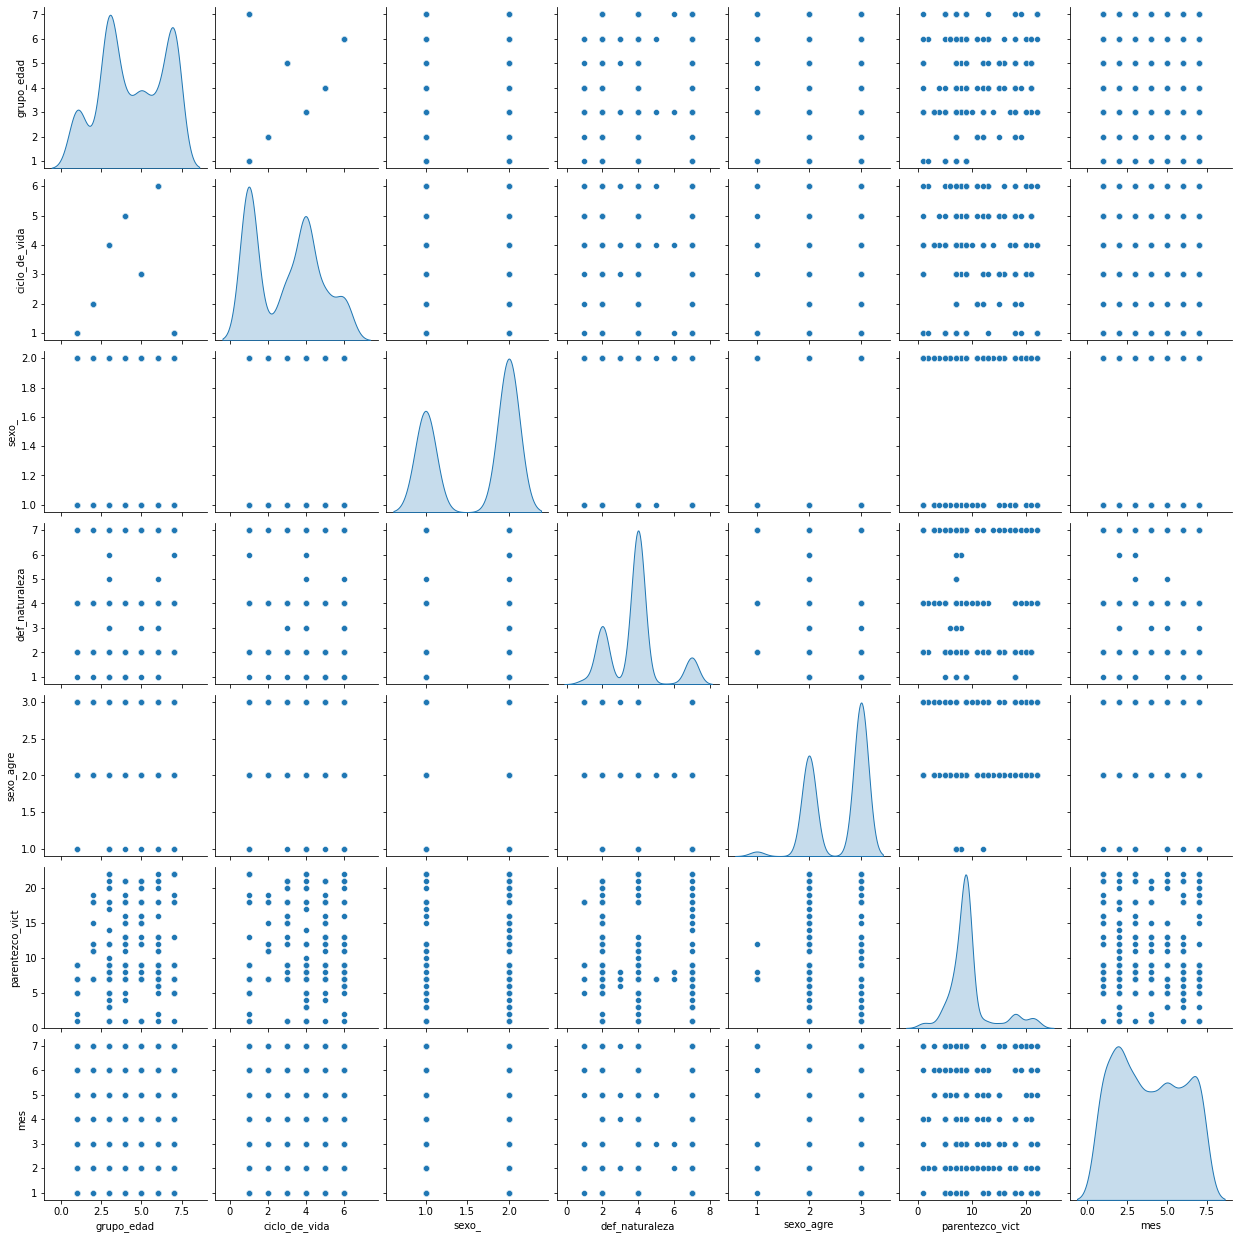

In [28]:
sns.pairplot(train_dataset[["grupo_edad", "ciclo_de_vida", "sexo_", "def_naturaleza", "sexo_agre", "parentezco_vict", "mes" ]], diag_kind="kde")

#Revisamos la distribucion conjunta de un par de columnas de el set de entrenamiento.

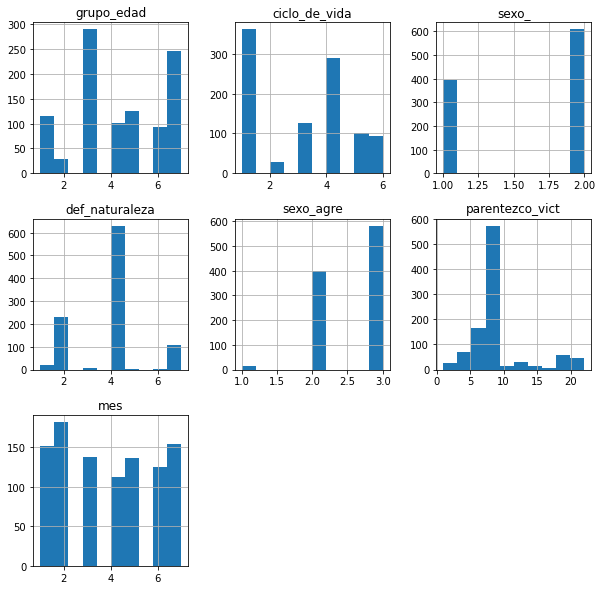

In [29]:
datos2.hist(figsize=(10,10))
pyplot.show()
#Revisamos distribucion de las variables

In [30]:
train_stats = train_dataset.describe()
train_stats.pop("sexo_")
train_stats = train_stats.transpose()
train_stats

#Revisamos las estadisticas generales

,count,mean,std,min,25%,50%,75%,max
grupo_edad,800.0,4.42750,2.022958,1.0,3.0,4.0,7.0,7.0
ciclo_de_vida,800.0,2.98625,1.748537,1.0,1.0,3.0,4.0,6.0
def_naturaleza,800.0,3.80625,1.433101,1.0,2.0,4.0,4.0,7.0
sexo_agre,800.0,2.57625,0.528711,1.0,2.0,3.0,3.0,3.0
parentezco_vict,800.0,9.46625,3.958023,1.0,7.0,9.0,9.0,22.0
mes,800.0,3.89875,2.065510,1.0,2.0,4.0,6.0,7.0


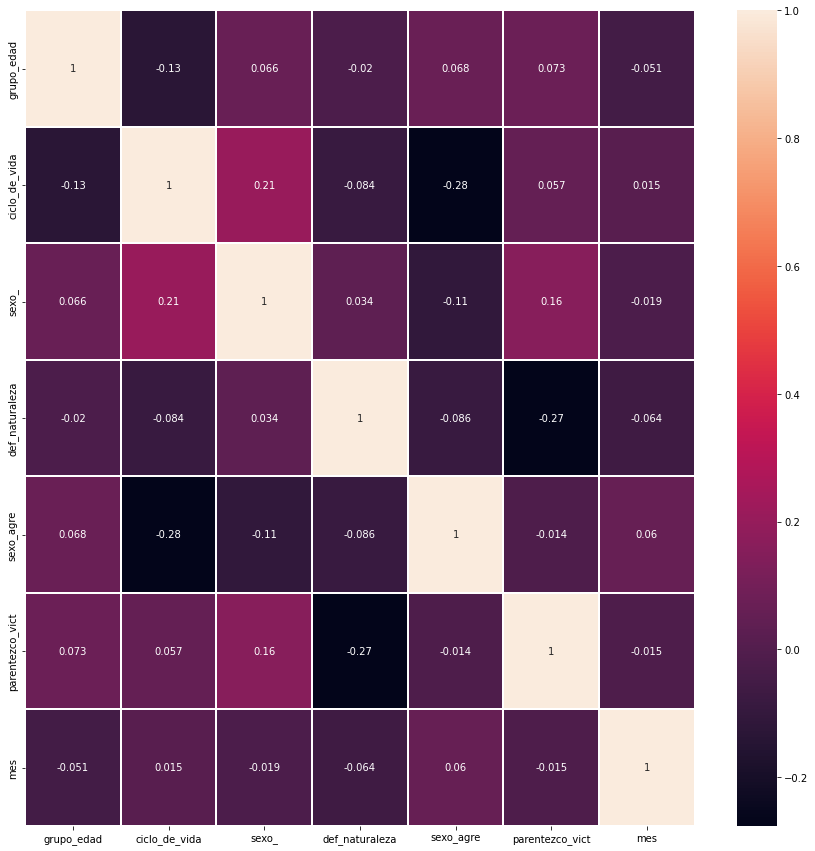

In [31]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(datos2.corr(), annot = True, linewidths=1, ax=ax)

#Correlacion de las variables mediante heatmap

In [32]:
train_labels = train_dataset.pop("sexo_")
test_labels = test_dataset.pop("sexo_")

#Separe el valor objetivo, o la "etiqueta" de las caracteristicas. Esta etiqueta es el valor que entrenara el modelo para predecir.

In [33]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std'] / train_stats['count'] / train_stats['min'] / train_stats['25%'] / train_stats['50%'] / train_stats['75%']
  / train_stats['max']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

#Normalizamos los datos

##Construimos nuestro modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que crearemos un segundo modelo, más adelante.

In [34]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [35]:
model = build_model()

##Inspeccionamos el modelo

Descripción simple del modelo

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


Ahora probamos el modelo. Tomando un lote de ejemplos 10 de los datos de entrenamiento y llamando un **model.predict** en él.

In [37]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-1.5755217e-05],
       [ 2.0600788e-05],
       [ 2.3888151e-05],
       [ 2.5245372e-05],
       [-2.3855213e-05],
       [ 1.9501085e-05],
       [-1.4298037e-05],
       [-6.9010821e-06],
       [ 1.0547500e-05],
       [-1.1712109e-05]], dtype=float32)

**Procedemos a entrenar el modelo**

In [38]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('Ncm', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


NcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcm
NcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcm
NcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcm
NcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcm

Visualizamos el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto history.

In [39]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.237715,0.477422,0.237715,0.226920,0.466008,0.226920,995
996,0.236661,0.475276,0.236661,0.231207,0.476651,0.231207,996
997,0.238305,0.478137,0.238305,0.229457,0.473136,0.229457,997
998,0.237381,0.478528,0.237381,0.227633,0.468464,0.227633,998
999,0.237408,0.477898,0.237408,0.227408,0.467773,0.227408,999


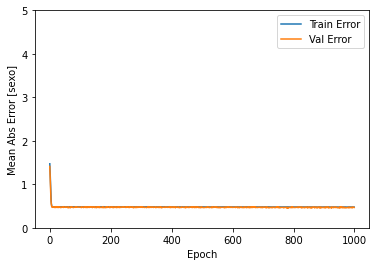

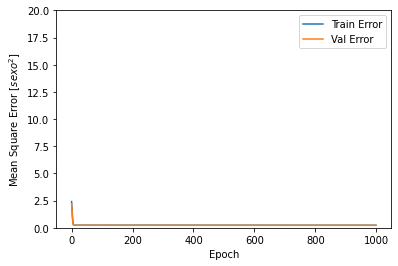

In [40]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [sexo]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$sexo^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


NcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcmNcm

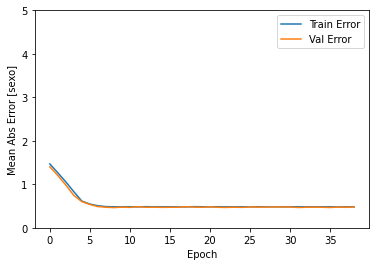

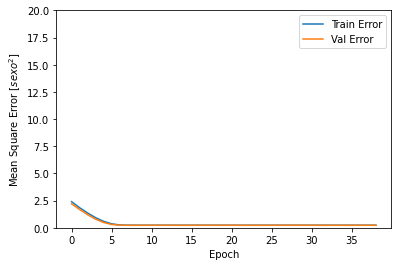

In [41]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

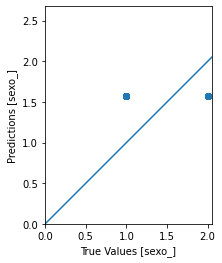

In [42]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [sexo_]')
plt.ylabel('Predictions [sexo_]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

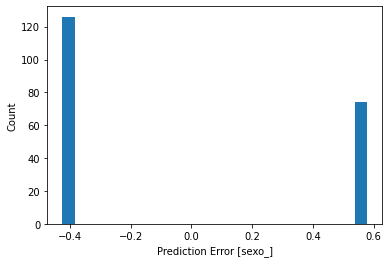

In [43]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [sexo_]")
_ = plt.ylabel("Count")

In [45]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Sexo_".format(mae))

7/7 - 0s - loss: 0.2359 - mae: 0.4801 - mse: 0.2359 - 29ms/epoch - 4ms/step
Testing set Mean Abs Error:  0.48 Sexo_


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

modelRF = RandomForestRegressor(n_estimators=10, random_state=0)

modelRF.fit(train_dataset, train_labels)
preds_test= modelRF.predict(test_dataset)

print('MSE RF : %.3f' % mean_squared_error(test_labels, preds_test, squared=True))
print('MSE DL : %.3f' % mse)
print('MAE RF : %.3f' % mean_absolute_error(test_labels, preds_test))
print('MAE DL : %.3f' % mae)

MSE RF : 0.218
MSE DL : 0.236
MAE RF : 0.357
MAE DL : 0.480


In [47]:
from ann_visualizer.visualize import ann_viz;
ann_viz(model, title="Artificial Neural network - Sexo_");

ModuleNotFoundError: ignored